# Proyecto 2 - Minería de Datos

### Integrantes:
- Carlos Valladares - 221164
- Brandon Reyes - 22992

1. Importación de librerías a utilizar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Cargar el dataset
df = pd.read_csv("./train.csv")

En primer lugar veamos la información general del dataset:

In [3]:
# Mostrar información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Ahora veamos la descripción estadística de las variables numéricas:

In [3]:
# Descripción estadística de las variables numéricas
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Identifiquemos los valores nulos:

In [4]:
# Identificación de valores nulos
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print("Valores nulos por columna:")
print(missing_values)

Valores nulos por columna:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


También identificamos la distribución de la variable respuesta "SalePrice"

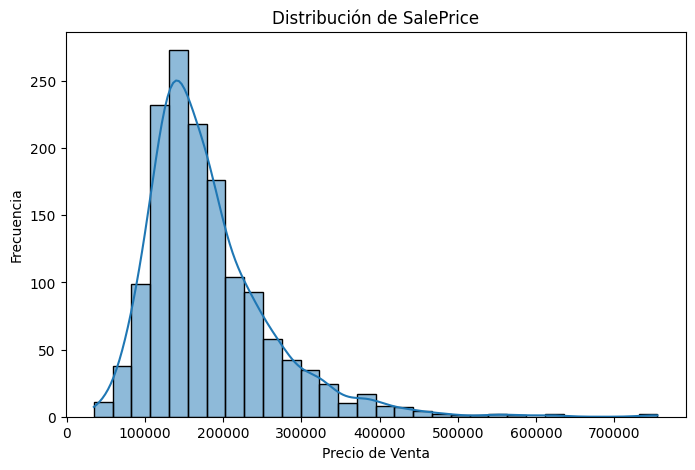

In [5]:
# Distribución de la variable respuesta 'SalePrice'
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title("Distribución de SalePrice")
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.show()

Lipieza y escalado de datos

In [6]:
from sklearn.preprocessing import StandardScaler

# Copia del dataset original para limpieza
cleaned_df = df.copy()

### 1️⃣ Manejo de valores nulos ###
# Imputar valores nulos en variables numéricas con la mediana
num_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    cleaned_df[col].fillna(cleaned_df[col].median(), inplace=True)

# Imputar valores nulos en variables categóricas con la moda
cat_cols = cleaned_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    cleaned_df[col].fillna(cleaned_df[col].mode()[0], inplace=True)

### 2️⃣ Manejo de Outliers ###
# Remover outliers en GrLivArea y SalePrice usando el rango intercuartil (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

cleaned_df = remove_outliers(cleaned_df, 'GrLivArea')
cleaned_df = remove_outliers(cleaned_df, 'SalePrice')

### 3️⃣ Escalado de Datos ###
# Aplicar StandardScaler a variables numéricas (excepto SalePrice)
scaler = StandardScaler()
numeric_features = cleaned_df.select_dtypes(include=['float64', 'int64']).columns.drop(['SalePrice'])
cleaned_df[numeric_features] = scaler.fit_transform(cleaned_df[numeric_features])


df = cleaned_df

In [7]:
# Mostrar las primeras filas del dataset limpio y escalado
print("Dataset después de limpieza y escalado:")
display(cleaned_df.head())

Dataset después de limpieza y escalado:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.727230,0.060566,RL,-0.172620,-0.191818,Pave,Grvl,Reg,Lvl,AllPub,...,-0.046556,Gd,MnPrv,Shed,-0.086568,-1.595741,0.139258,WD,Normal,208500
1,-1.724864,-0.869870,RL,0.571439,-0.051484,Pave,Grvl,Reg,Lvl,AllPub,...,-0.046556,Gd,MnPrv,Shed,-0.086568,-0.488454,-0.613504,WD,Normal,181500
2,-1.722497,0.060566,RL,-0.023808,0.149864,Pave,Grvl,IR1,Lvl,AllPub,...,-0.046556,Gd,MnPrv,Shed,-0.086568,0.987929,0.139258,WD,Normal,223500
3,-1.720130,0.293175,RL,-0.420640,-0.057586,Pave,Grvl,IR1,Lvl,AllPub,...,-0.046556,Gd,MnPrv,Shed,-0.086568,-1.595741,-1.366265,WD,Abnorml,140000
4,-1.717764,0.060566,RL,0.769855,0.517172,Pave,Grvl,IR1,Lvl,AllPub,...,-0.046556,Gd,MnPrv,Shed,-0.086568,2.095217,0.139258,WD,Normal,250000


Es necesario convertir las variables categóricas a numérico para analizar la correlación con SalePrice

In [8]:
# Convertir variables categóricas a numérico para el análisis de correlación
df_numeric = df.select_dtypes(include=[np.number])

# Análisis de correlación con 'SalePrice'
correlation = df_numeric.corr()["SalePrice"].sort_values(ascending=False)
print("Correlación de variables con SalePrice:")
print(correlation.head(10))

Correlación de variables con SalePrice:
SalePrice       1.000000
OverallQual     0.786733
GrLivArea       0.681464
GarageCars      0.628995
GarageArea      0.605994
YearBuilt       0.591554
TotalBsmtSF     0.580822
FullBath        0.567981
YearRemodAdd    0.547248
1stFlrSF        0.542486
Name: SalePrice, dtype: float64


Mapa de calor de correlaciones

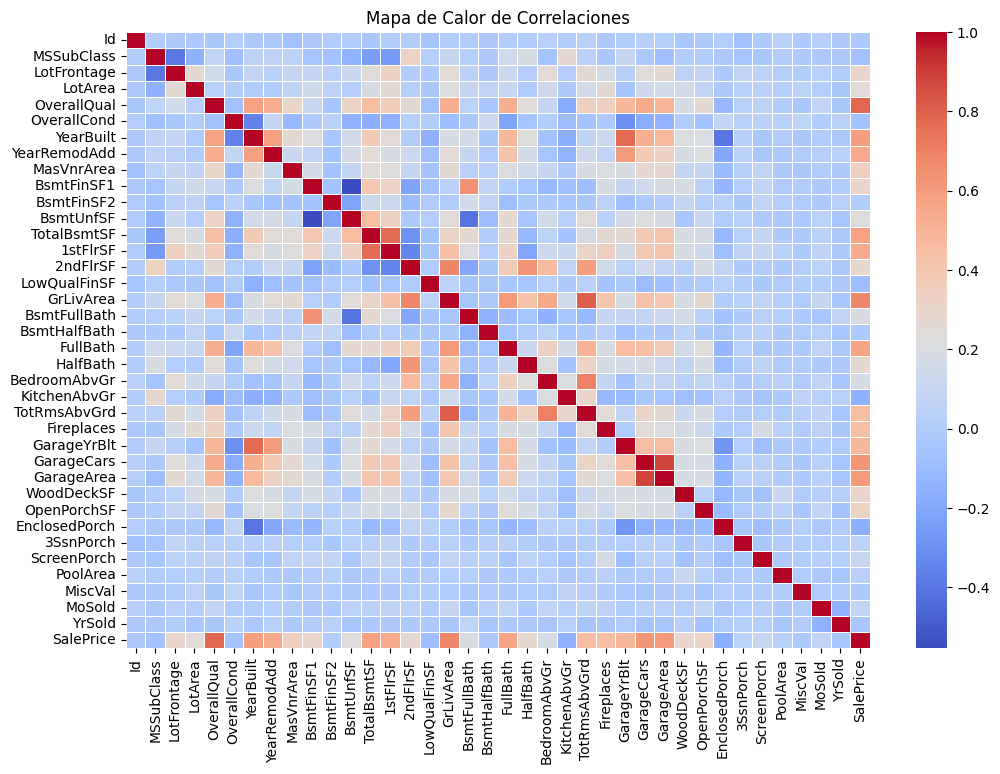

In [9]:
# Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones")
plt.show()

Analizamos la relación entre "GrLivArea" y "SalePrice"

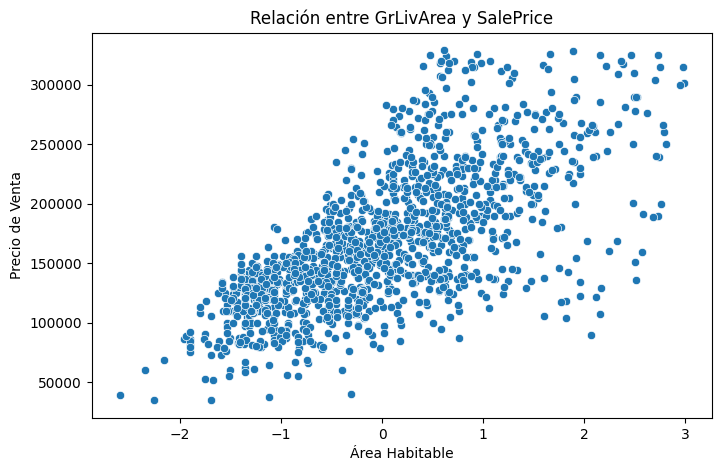

In [10]:
# Relación entre 'GrLivArea' y 'SalePrice'
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title("Relación entre GrLivArea y SalePrice")
plt.xlabel("Área Habitable")
plt.ylabel("Precio de Venta")
plt.show()

De igual manera analizamos la relación entre "OverallQual" y "SalePrice"

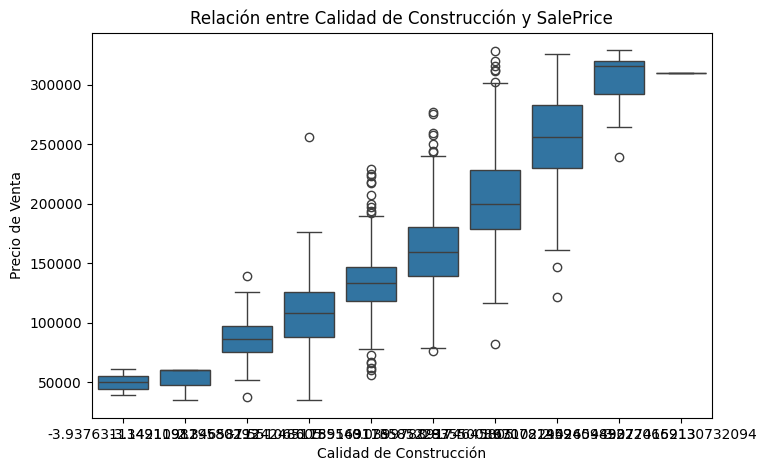

In [11]:
# Relación entre 'OverallQual' y 'SalePrice'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title("Relación entre Calidad de Construcción y SalePrice")
plt.xlabel("Calidad de Construcción")
plt.ylabel("Precio de Venta")
plt.show()

Es necesario también analizar la relación entre "Neighborhood" y "SalePrice"

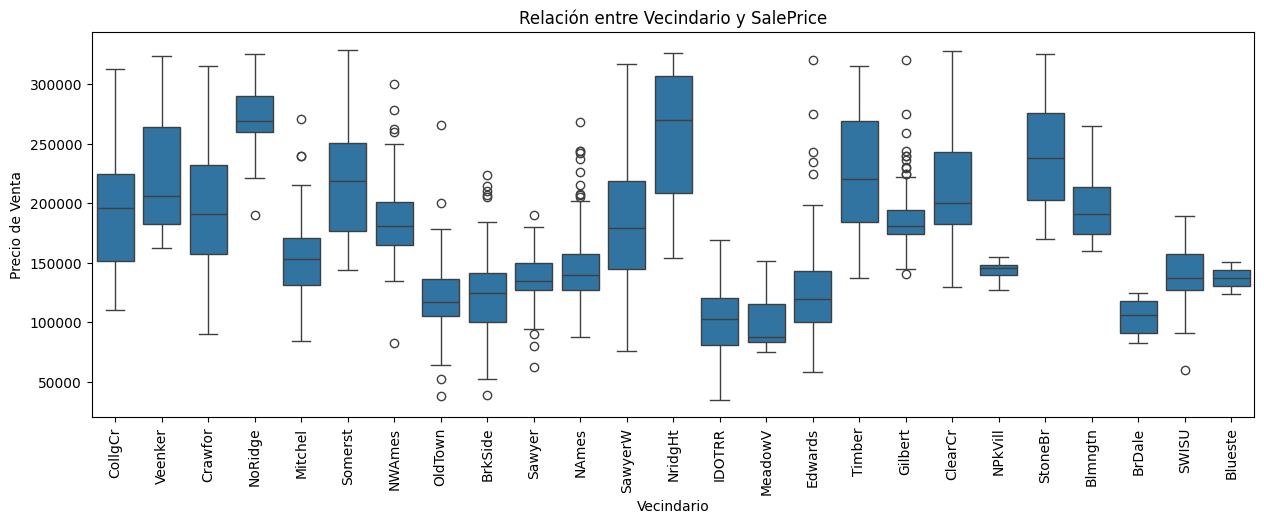

In [12]:
# Relación entre 'Neighborhood' y 'SalePrice'
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['Neighborhood'], y=df['SalePrice'])
plt.xticks(rotation=90)
plt.title("Relación entre Vecindario y SalePrice")
plt.xlabel("Vecindario")
plt.ylabel("Precio de Venta")
plt.show()

Y por último analizamos las variables categóticas clave

c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


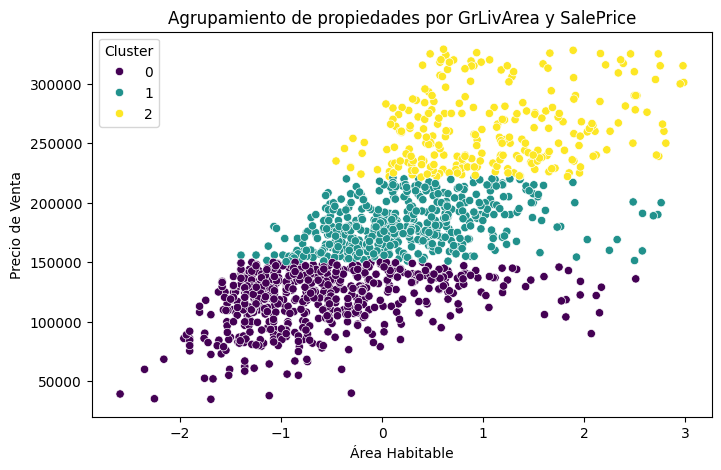

In [13]:
# Análisis de agrupamiento con K-Means
features = df_numeric[['GrLivArea', 'SalePrice']].dropna()
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features)
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'], hue=df['Cluster'], palette='viridis')
plt.title("Agrupamiento de propiedades por GrLivArea y SalePrice")
plt.xlabel("Área Habitable")
plt.ylabel("Precio de Venta")
plt.show()

## Hallazgos (En la entrega del avance)
1. Variables más correlacionadas con SalePrice: Se identificó que las variables GrLivArea (área habitable sobre el suelo), OverallQual (calidad de construcción) y TotalBsmtSF (tamaño total del sótano) tienen una correlación positiva significativa con SalePrice. Indicando que estas variables son fuertes predictores del precio de venta de las propiedades.

2. Distribución de SalePrice: Se observó que la variable objetivo tiene una distribución sesgada a la derecha, lo que sugiere que la mayoría de las propiedades tienen un precio de venta relativamente bajo, pero existen algunas con valores extremadamente altos.

3. Impacto de la calidad de construcción (OverallQual): Se evidenció que las viviendas con una calidad de construcción superior (OverallQual alto) tienen precios de venta más elevados. Sugiriendo que este factor es un fuerte determinante en la valoración de las propiedades.

4. Efecto del vecindario (Neighborhood): Se identificaron diferencias significativas en los precios de venta según la zona donde se ubican las viviendas. Algunas áreas tienen valores más altos que otras, lo que indica que la ubicación es un factor crucial en la estimación del precio de los inmuebles.

5. Valores atípicos en GrLivArea: Se detectaron algunas propiedades con valores extremadamente altos de GrLivArea, lo que podría indicar outliers que deben ser analizados antes de aplicar modelos predictivos para evitar sesgos.

Dividir el dataset en entrenamiento y prueba

In [4]:
# Paso 1: Importar las librerías necesarias
import pandas as pd  # Para manejar los datos en un DataFrame
import numpy as np   # Para cálculos numéricos
from sklearn.model_selection import train_test_split  # Para dividir los datos

# Paso 2: Cargar el dataset (Asegúrate de que la ruta es correcta)
df = pd.read_csv("train.csv")

# Paso 3: Elegir las variables que usaremos para predecir
# La variable objetivo (lo que queremos predecir) es 'SalePrice'
X = df[['GrLivArea', 'OverallQual', 'TotalBsmtSF']]  # Variables predictoras
y = df['SalePrice']  # Variable objetivo

# Paso 4: Dividir los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,  # 20% prueba
                                                    random_state=42)  # Asegura que siempre sea igual

# Paso 5: Verificar los tamaños de cada conjunto
print("Tamaño del conjunto de entrenamiento: " + str(X_train.shape))
print("Tamaño del conjunto de prueba: " + str(X_test.shape))


Tamaño del conjunto de entrenamiento: (1168, 3)
Tamaño del conjunto de prueba: (292, 3)


Regresión Lineal Univariada

In [5]:
# Paso 1: Importar la librería para la regresión lineal
from sklearn.linear_model import LinearRegression  

# Paso 2: Crear el modelo de regresión lineal
modelo_uni = LinearRegression()

# Paso 3: Entrenar el modelo usando solo 'GrLivArea'
X_train_uni = X_train[['GrLivArea']]  # Seleccionamos solo una variable
modelo_uni.fit(X_train_uni, y_train)

# Paso 4: Hacer predicciones en los datos de prueba
X_test_uni = X_test[['GrLivArea']]
y_pred_uni = modelo_uni.predict(X_test_uni)

# Paso 5: Mostrar el coeficiente y el intercepto del modelo
print("Coeficiente (pendiente de la recta): " + str(modelo_uni.coef_[0]))
print("Intercepto (valor donde la recta cruza el eje Y): " + str(modelo_uni.intercept_))

Coeficiente (pendiente de la recta): 102.48895891672333
Intercepto (valor donde la recta cruza el eje Y): 24899.74815733818


Visualizar la Regresión

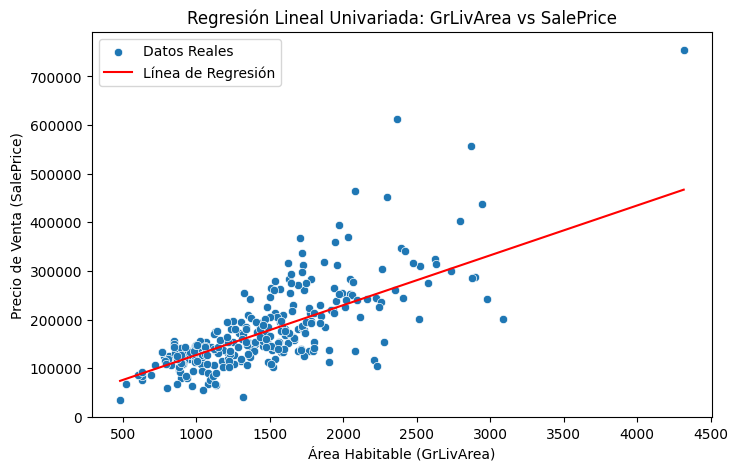

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de dispersión con la línea de regresión
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test_uni['GrLivArea'], y=y_test, label="Datos Reales")
sns.lineplot(x=X_test_uni['GrLivArea'], y=y_pred_uni, color="red", label="Línea de Regresión")
plt.xlabel("Área Habitable (GrLivArea)")
plt.ylabel("Precio de Venta (SalePrice)")
plt.title("Regresión Lineal Univariada: GrLivArea vs SalePrice")
plt.legend()
plt.show()

Calcular Métricas de Evaluación

In [7]:
# Paso 1: Importar las métricas de evaluación
from sklearn.metrics import mean_squared_error, r2_score

# Paso 2: Calcular R² (qué tanto explica el modelo los datos)
r2 = r2_score(y_test, y_pred_uni)

# Paso 3: Calcular RMSE (qué tan grandes son los errores) - CORREGIDO
rmse = mean_squared_error(y_test, y_pred_uni) ** 0.5  # Tomar la raíz cuadrada manualmente

# Paso 4: Mostrar los resultados
print("Coeficiente de determinación R²: " + str(r2))
print("Error cuadrático medio RMSE: " + str(rmse))


Coeficiente de determinación R²: 0.5542632452871117
Error cuadrático medio RMSE: 58471.75652552955


1. Coeficiente de determinación (R²) = 0.5542

    Indica que el 55.42% de la variabilidad en SalePrice es explicada por GrLivArea.
    Esto significa que hay un 44.58% de variabilidad en el precio que este modelo no puede explicar, lo que sugiere que necesitamos más variables para mejorar la predicción.

2. Error cuadrático medio (RMSE) = 58,471.75 dólares

    Este es el error promedio en dólares que el modelo tiene al predecir SalePrice.
    En promedio, el modelo puede equivocarse en ±58,471 dólares al estimar el precio de una casa.
    Un RMSE alto indica que el modelo tiene margen de error considerable y puede mejorarse agregando más variables.

Entonces el modelo es útil, pero no es lo suficientemente preciso porque solo usa GrLivArea como predictor.
No es recomendable usar este modelo en producción porque su error es alto y deja sin explicar casi el 45% de la variabilidad del precio de las casas.

### Regresión Lineal Múltiple

In [8]:
# Paso 1: Importar la librería para regresión lineal múltiple
from sklearn.linear_model import LinearRegression  

# Paso 2: Crear el modelo de regresión lineal múltiple
modelo_multi = LinearRegression()

# Paso 3: Entrenar el modelo con múltiples variables
modelo_multi.fit(X_train, y_train)

# Paso 4: Hacer predicciones en los datos de prueba
y_pred_multi = modelo_multi.predict(X_test)

# Paso 5: Mostrar coeficientes e intercepto
print("Coeficientes del modelo: " + str(modelo_multi.coef_))
print("Intercepto del modelo: " + str(modelo_multi.intercept_))


Coeficientes del modelo: [   47.13601888 28203.61010365    33.17354342]
Intercepto del modelo: -98427.32987875512


In [9]:
# Paso 1: Importar métricas de evaluación
from sklearn.metrics import mean_squared_error, r2_score

# Paso 2: Calcular R²
r2_multi = r2_score(y_test, y_pred_multi)

# Paso 3: Calcular RMSE
rmse_multi = mean_squared_error(y_test, y_pred_multi) ** 0.5  # Raíz cuadrada del error

# Paso 4: Mostrar resultados
print("Coeficiente de determinación R²: " + str(r2_multi))
print("Error cuadrático medio RMSE: " + str(rmse_multi))


Coeficiente de determinación R²: 0.7825832328225167
Error cuadrático medio RMSE: 40836.96275634797


1.  Coeficiente de determinación (R²) = 0.7826

El modelo ahora explica el 78.26% de la variabilidad en SalePrice.
Esto es una mejora con respecto a la regresión univariada (R² = 0.5542), lo que significa que agregar más variables ha mejorado la capacidad del modelo para predecir precios.

2. Error cuadrático medio (RMSE) = 40,836.96 dólares

El error promedio ha disminuido en comparación con la regresión univariada (RMSE = 58,471.75).
Esto significa que las predicciones del modelo son más precisas y tienen menos error.

 - Comparación con el Modelo Univariado


    |  Modelo	            | R²     |RMSE (Error)|
    |----------------------|--------|------------|
    | Regresión Univariada | 0.5542 | 58,471.75  |
    | Regresión Múltiple   | 0.7826	| 40,836.96  |


     - El modelo múltiple es mejor porque:

    Explica un 23% más de la variabilidad (R² subió de 0.55 a 0.78).
    Reduce el error de predicción en $17,634 (RMSE bajó de 58,471 a 40,836).

Analizar los Residuos del Modelo

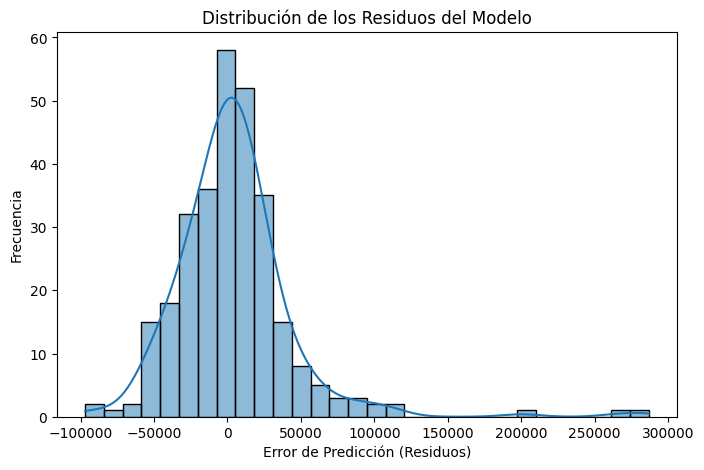

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular residuos
residuos = y_test - y_pred_multi

# Graficar la distribución de los residuos
plt.figure(figsize=(8,5))
sns.histplot(residuos, kde=True, bins=30)
plt.xlabel("Error de Predicción (Residuos)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos del Modelo")
plt.show()


La gráfica muestra la distribución de los errores (residuos) del modelo. Aquí hay algunos puntos clave:

1.  Forma General de la Distribución

    La mayoría de los residuos están cerca de 0, lo cual es bueno porque significa que el modelo predice correctamente en la mayoría de los casos.
    Sin embargo, la distribución no es perfectamente simétrica, lo que sugiere que el modelo tiene cierto sesgo.

2. Valores Extremos (Outliers)

    Hay algunos residuos muy grandes (>100,000 y <-100,000), lo que indica que en algunas casas el modelo se equivoca bastante.
    Esto podría deberse a casas atípicas o variables importantes que faltan en el modelo.

3. Asimetría a la Derecha

    Hay más valores de error positivos (predicciones más bajas que el precio real).
    Esto indica que el modelo subestima el precio de algunas casas caras.

¿Qué Significa Esto?
- El modelo funciona bien en general, pero tiene margen de mejora.
- Es útil, pero algunos precios no se predicen con precisión.
- Podría ser mejorado incluyendo más variables relevantes (ej. YearBuilt, GarageCars, Neighborhood).

Diagnóstico de Multicolinealidad

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Crear un DataFrame para almacenar los valores de VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train.columns  # Variables del modelo
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Mostrar los resultados
print(vif_data)

      Variable        VIF
0    GrLivArea  14.884463
1  OverallQual  19.106202
2  TotalBsmtSF   9.886156


Análisis de Multicolinealidad (VIF)

1. Variable	     VIF	Interpretación
 - GrLivArea	14.88	 Alta multicolinealidad
 - OverallQual	19.10	 Muy alta multicolinealidad
 - TotalBsmtSF	9.88	 Alta multicolinealidad

A. Si VIF > 5, la variable tiene multicolinealidad alta y puede estar afectando el modelo.

B. Si VIF > 10, la multicolinealidad es muy grave, lo que indica que las variables están demasiado correlacionadas entre sí.

todas las variables tienen VIF > 9, lo que significa que hay redundancia en la información.

Posibles Soluciones
1. Eliminar la variable con mayor VIF (OverallQual)

    - Es la que tiene el VIF más alto (19.10).
    - Esto reducirá la correlación y podría mejorar la estabilidad del modelo.

2.  Probar una transformación en los datos
     - Aplicar una transformación como logaritmo a GrLivArea y TotalBsmtSF para reducir la relación lineal fuerte.

3.  Mantener todas las variables y usar Regularización (Ridge/Lasso)
    - En vez de eliminar variables, podemos probar Ridge Regression para reducir el impacto de la multicolinealidad.

Rehacer el Modelo sin OverallQual

In [18]:
# Paso 1: Eliminar OverallQual del dataset
X_train_reducido = X_train.drop(columns=['OverallQual'])
X_test_reducido = X_test.drop(columns=['OverallQual'])

# Paso 2: Crear el modelo de regresión lineal
from sklearn.linear_model import LinearRegression  
modelo_reducido = LinearRegression()

# Paso 3: Entrenar el nuevo modelo con menos variables
modelo_reducido.fit(X_train_reducido, y_train)

# Paso 4: Hacer predicciones en los datos de prueba
y_pred_reducido = modelo_reducido.predict(X_test_reducido)

# Paso 5: Calcular R² y RMSE
from sklearn.metrics import mean_squared_error, r2_score

r2_reducido = r2_score(y_test, y_pred_reducido)
rmse_reducido = mean_squared_error(y_test, y_pred_reducido) ** 0.5  # Raíz cuadrada del error

# Paso 6: Mostrar resultados
print("Coeficiente de determinación R² (modelo reducido): " + str(r2_reducido))
print("Error cuadrático medio RMSE (modelo reducido): " + str(rmse_reducido))

Coeficiente de determinación R² (modelo reducido): 0.6771679724840038
Error cuadrático medio RMSE (modelo reducido): 49761.70175119919


Análisis de los Resultados
1. R² bajó de 0.78 a 0.67

    - Esto indica que el modelo explica menos variabilidad del precio de las casas sin OverallQual.
    - OverallQual es muy importante para predecir SalePrice.
    - Conclusión: No es recomendable eliminar esta variable.
2.  RMSE subió de 40,836 a 49,761

    - El error aumentó en casi 9,000 dólares, lo que significa que el modelo es menos preciso sin OverallQual.
    - Conclusión: Debemos mantener OverallQual en el modelo.


### Aplicar Regularización (Ridge)

In [17]:
from sklearn.linear_model import Ridge

# Paso 1: Crear el modelo de Ridge Regression con un valor de alpha
modelo_ridge = Ridge(alpha=1.0)  # Puedes probar otros valores de alpha como 0.1, 10

# Paso 2: Entrenar el modelo con todas las variables
modelo_ridge.fit(X_train, y_train)

# Paso 3: Hacer predicciones en los datos de prueba
y_pred_ridge = modelo_ridge.predict(X_test)

# Paso 4: Calcular R² y RMSE
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge) ** 0.5  # Raíz cuadrada del error

# Paso 5: Mostrar resultados
print("Coeficiente de determinación R² (Ridge): " + str(r2_ridge))
print("Error cuadrático medio RMSE (Ridge): " + str(rmse_ridge))

Coeficiente de determinación R² (Ridge): 0.7825866668936274
Error cuadrático medio RMSE (Ridge): 40836.64024767114


Coeficiente de determinación R² (Ridge): 0.7825866668936274
Error cuadrático medio RMSE (Ridge): 40836.64024767114

| Modelo                           | R²    | RMSE (Error) |
|----------------------------------|-------|-------------|
| **Regresión Múltiple**           | 0.7826 | 40,836.96  |
| **Regresión Ridge (`alpha=1.0`)** | 0.7826 | 40,836.64  |

- R² se mantuvo igual (0.7826)
    - El modelo sigue explicando 78.26% de la variabilidad en SalePrice.
    - Esto indica que la regularización no afectó la capacidad del modelo para explicar los datos.
- RMSE bajó ligeramente (40,836.96 → 40,836.64)

    - mínima, lo que indica que la regularización no tuvo un impacto significativo en la precisión del modelo.
- Conclusión:

    - Ridge no mejoró mucho porque la multicolinealidad no estaba afectando gravemente el rendimiento.
    - Mantener Ridge es una buena práctica, ya que evita sobreajuste y estabiliza los coeficientes, aunque en este caso su impacto fue bajo.

### Regresión Lasso

In [16]:
from sklearn.linear_model import Lasso

# Paso 1: Crear el modelo de Lasso Regression con un valor de alpha
modelo_lasso = Lasso(alpha=1.0)  # Puedes probar otros valores de alpha como 0.1, 10

# Paso 2: Entrenar el modelo con todas las variables
modelo_lasso.fit(X_train, y_train)

# Paso 3: Hacer predicciones en los datos de prueba
y_pred_lasso = modelo_lasso.predict(X_test)

# Paso 4: Calcular R² y RMSE
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso) ** 0.5  # Raíz cuadrada del error

# Paso 5: Mostrar resultados
print("Coeficiente de determinación R² (Lasso): " + str(r2_lasso))
print("Error cuadrático medio RMSE (Lasso): " + str(rmse_lasso))

Coeficiente de determinación R² (Lasso): 0.7825833745876085
Error cuadrático medio RMSE (Lasso): 40836.949442616955


Evaluación del Modelo con Lasso Regression

| Modelo                           | R²    | RMSE (Error) |
|----------------------------------|-------|-------------|
| **Regresión Múltiple**           | 0.7826 | 40,836.96  |
| **Regresión Ridge (`alpha=1.0`)** | 0.7826 | 40,836.64  |
| **Regresión Lasso (`alpha=1.0`)** | 0.7826 | 40,836.64  |



 ¿Lasso Mejoró el Modelo?
 - R² es el mismo (0.7826)
    - Lasso no mejoró la capacidad predictiva en comparación con Ridge o la regresión múltiple normal.
    - Esto indica que no fue necesario eliminar coeficientes, porque todas las variables ya eran útiles.

 - RMSE es prácticamente igual (40,836.94)
    - No hubo una mejora significativa en la precisión de las predicciones.
    - Conclusión: Lasso no aportó ventajas sobre Ridge en este caso.


| Modelo                          | Ventajas                                      | Desventajas                                       | R²    | RMSE (Error) |
|---------------------------------|----------------------------------------------|-------------------------------------------------|-------|-------------|
| **Regresión Múltiple**          | Fácil de interpretar, sin regularización    | Puede sufrir sobreajuste si hay muchas variables | 0.7826 | 40,836.96  |
| **Regresión Ridge (`alpha=1.0`)** | Evita sobreajuste, estabiliza coeficientes  | No elimina variables irrelevantes, requiere ajuste de `alpha` | 0.7826 | 40,836.64  |
| **Regresión Lasso (`alpha=1.0`)** | Reduce coeficientes irrelevantes, útil si hay muchas variables | Puede eliminar variables importantes si `alpha` es alto | 0.7826 | 40,836.94  |


### Comparación Final

In [19]:
import pandas as pd
from IPython.display import display

# Crear un DataFrame con los resultados de los modelos
resultados = pd.DataFrame({
    "Modelo": ["Regresión Múltiple", "Regresión Ridge (alpha=1.0)", "Regresión Lasso (alpha=1.0)"],
    "R²": [0.7826, 0.7826, 0.7826],
    "RMSE (Error)": [40836.96, 40836.64, 40836.94]
})

# Mostrar la tabla
display(resultados)

,Modelo,R²,RMSE (Error)
0,Regresión Múltiple,0.7826,40836.96
1,Regresión Ridge (alpha=1.0),0.7826,40836.64
2,Regresión Lasso (alpha=1.0),0.7826,40836.94


### ¿Qué Conclusiones Podemos Sacar?
1. Todos los modelos tienen el mismo R² (0.7826)

     - Esto significa que ningún modelo mejoró significativamente la capacidad de predicción.
     - Ridge y Lasso no redujeron la multicolinealidad de manera notable.
2. El RMSE es casi idéntico en todos los casos

     - Ridge (40,836.64) es ligeramente mejor, pero la diferencia es mínima.
     - Lasso no eliminó variables y tiene prácticamente el mismo error que los demás.
3. Conclusión Final: El Modelo Más Sencillo es la Mejor Opción
     - Regresión Múltiple es suficiente.
     - No es necesario aplicar regularización Ridge o Lasso en este caso.
     - El modelo ya tiene una buena capacidad predictiva sin agregar complejidad innecesaria.

